In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [3]:
# retrieve Fashion MNIST dataset from tf library 
fashion_mnist = tf.keras.datasets.fashion_mnist
#train_images = questions on flashcards, train_labels = answers (label = answer)
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


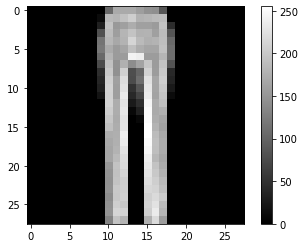

In [4]:
# training data

# use matplotlib to plot image of fashion clothing
import matplotlib.pyplot as plt

# 69 = question number to study with 
data_idx = 69

# plot image
plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
# classifies the image according to 10 previously-defined categories
train_labels[data_idx]

1

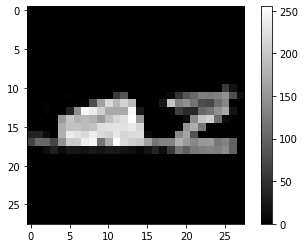

In [6]:
# validation data
import matplotlib.pyplot as plt

data_idx = 420
plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
valid_labels[data_idx]

5

In [8]:
# neuron takes each pixel value, assigns a weight. Image = 28 x 28 pixels
valid_images[data_idx]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
# layer 1) Flatten - convert multidimensional data into 1D data (ex list)
# layer 2) Dense - neuron row, each neuron has weight w
# clothing guess = whichever neuron assigned to each label (of 10) has the greatest output
# ex. place 10 neurons --> 10 categories of clothing
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [10]:
# Sequential is used for a plain stack of layers where each layer
# has one input and output tensor
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(number_of_classes)
])

2022-12-17 02:01:37.706506: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
# Verify model 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
# model uses sparse categorial cross entropy classification
# grades the neurons simultaneously

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [13]:
# epoch = one review of the training dataset
# model is quizzed with the validation data after each epoch/iteration
history = model.fit(
    train_images, train_labels, epochs=5, verbose=True, validation_data=(valid_images, valid_labels))

2022-12-17 02:01:37.944723: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 16.8591 - accuracy: 0.7430 - val_loss: 13.3426 - val_accuracy: 0.7833
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 12.3343 - accuracy: 0.7850 - val_loss: 13.1847 - val_accuracy: 0.7694
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 11.5823 - accuracy: 0.7924 - val_loss: 13.7571 - val_accuracy: 0.7720
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 10.6563 - accuracy: 0.8015 - val_loss: 11.0093 - val_accuracy: 0.7910
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 10.3864 - accuracy: 0.8004 - val_loss: 17.9120 - val_accuracy: 0.7477


In [14]:
# Prediction: Keras expects multiple datapoints when predicting
# if we want to predict on a single point, first convert to batch of 1 dp
model.predict(train_images[0:10])

array([[ -178.27106  ,  -352.2696   ,   -56.5412   ,  -313.8241   ,
         -323.23187  ,   400.12927  ,    57.29184  ,   397.98734  ,
          138.02147  ,   520.7953   ],
       [  483.5866   ,  -259.13992  ,   261.99307  ,   162.70203  ,
          -64.37854  , -1132.5696   ,   322.9968   , -1762.3112   ,
            6.28126  ,  -608.9262   ],
       [  158.98639  ,    34.303745 ,   118.44884  ,   181.05148  ,
           97.06449  ,  -429.68903  ,   120.14782  ,  -493.3461   ,
          -23.111223 ,  -178.54115  ],
       [  236.58534  ,     6.987882 ,   175.65671  ,   239.87036  ,
          106.438576 ,  -718.71576  ,   228.96819  ,  -948.99744  ,
          -40.563725 ,  -514.9191   ],
       [  339.1899   ,   169.60066  ,   220.80798  ,   364.8426   ,
          183.83974  ,  -935.3348   ,   255.35515  ,  -738.4814   ,
          103.464836 ,  -679.0573   ],
       [  305.46646  ,    23.725668 ,   427.60812  ,    83.53412  ,
          226.89204  ,  -758.71344  ,   317.311    , -146

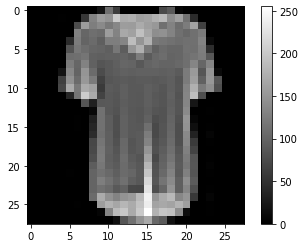

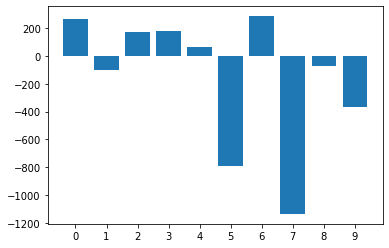

0


In [15]:
data_idx = 6969

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print(train_labels[data_idx])